In [ ]:
pip install ndlib

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import ndlib.models.epidemics as ep
import json
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [ ]:
#g = nx.read_gml("/content/drive/My Drive/Colab Notebooks/football.gml")
g = nx.karate_club_graph()
nodes = len(g.nodes)

In [ ]:
nodes

34

In [ ]:
centrality = nx.degree_centrality(g)

In [ ]:
centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [ ]:
df=pd.DataFrame(centrality.values()).describe()

In [ ]:
df

,0
count,34.000000
mean,0.139037
std,0.117509
min,0.030303
25%,0.060606
50%,0.090909
75%,0.151515
max,0.515152


**Whole graph coverage**

In [ ]:
def whole_graph_coverage():

  for j in range(3,8):
    iterations=[]
    for key,value in centrality.items():
      if value == df[0][j]:
        infected_node = [key]

        model = ep.SIModel(g)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.1) # infection rate
        cfg.add_model_initial_configuration("Infected", infected_node)
        model.set_initial_status(cfg)

        infected = 0
        i = 0
        while(infected != nodes):
          iteration = model.iteration()
          infected = iteration['node_count'][1]
          i+=1
        
        iterations.append(i)

    required_iterations.append(iterations)
        

In [ ]:
required_iterations=[]
whole_graph_coverage()

In [ ]:
required_iterations

[[36],
 [22, 31, 31, 32, 31, 31, 22, 34, 31, 21, 21],
 [41, 29, 16, 26, 30, 29],
 [33, 22, 24],
 [25]]

In [ ]:
pad=10
for lst in required_iterations:
  while(len(lst)!=pad):
    if(len(lst)>pad): lst.pop()
    else: lst.append(np.mean(lst))

In [ ]:
data=pd.DataFrame({'min' : required_iterations[0], 
                   'min_med' : required_iterations[1],
                   'median' : required_iterations[2],
                   'max_med' : required_iterations[3],
                   'max' : required_iterations[4]})


In [ ]:
data

,min,min_med,median,max_med,max
0,36.0,22,41.0,33.000000,25.0
1,36.0,31,29.0,22.000000,25.0
2,36.0,31,16.0,24.000000,25.0
3,36.0,32,26.0,26.333333,25.0
4,36.0,31,30.0,26.333333,25.0
5,36.0,31,29.0,26.333333,25.0
6,36.0,22,28.5,26.333333,25.0
7,36.0,34,28.5,26.333333,25.0
8,36.0,31,28.5,26.333333,25.0
9,36.0,21,28.5,26.333333,25.0


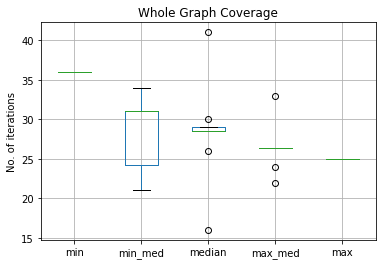

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.title('Whole Graph Coverage')
plt.ylabel('No. of iterations')
data.boxplot(column=['min', 'min_med', 'median','max_med','max'])

In [ ]:
model = ep.SIModel(g)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.1) # infection rate
cfg.add_model_initial_configuration("Infected", [4])
model.set_initial_status(cfg)

In [ ]:
iteration = model.iteration()
node_stats=iteration['status']

In [ ]:
infected_nodes=[]
for i in node_stats:
  if node_stats[i]==1:
    infected_nodes.append(i)
infected_nodes

[4]

In [ ]:
nodes

34

In [ ]:
while(len(infected_nodes) != nodes):
  iteration = model.iteration()
  node_stats=iteration['status']
  if(node_stats):
    for key in node_stats.keys():
      infected_nodes.append(key)

print(infected_nodes)

KeyboardInterrupt: ignored

In [ ]:
list(nx.neighbors(g,0))
infected = 0
NC=[]
while(infected != nodes):
  iteration = model.iteration()
  infected = iteration['node_count'][1]
  infected_neighbors=set(infected_nodes)&set(nx.neighbors(g,infected_node))
  for i in range(len(infected_neighbours)):
    i+=1
    sum+=infected_neighbors[i]/len(list(nx.neighbors(g,infected_neighbors[i])))
  NC[i]=sum/iteration['node_count'][1]
print(NC)


TypeError: ignored